#Data Argumentation¶
A common problem, is the amount of data available to enter the models, for models to present the expected results it is necessary for training to occur with a large amount of data (dataset), but in many cases the data needed to perform these tasks is not available. This is where the Data Augmentation technique comes in that, as the name suggests, allows us to augment our dataset in two ways:

*Introducing disturbances in the original data. For example: taking an original *image centered, we replicate it off-center, reversing axes.
Using different distributions. Example: if we want to train a model to classify high-resolution images, we add low-resolution images, with noise… always maintaining the highest high-resolution ratio.

At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique pictures.

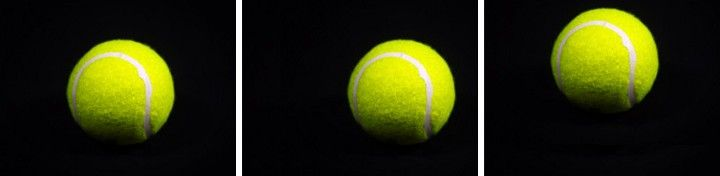



The same ball with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal. There are many ways to augment data with images, such as:

-Turn around (Flip)

-Rotation

-Scale

-Cutout

-Traslation

-Gaussian noise









#What is Keras?
Keras is an open source library (with MIT license) written in Python, which is mainly based on the work of François Chollet, a Google developer, in the framework of the ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System) project . The first version of this multiplatform software was released on March 28, 2015. The goal of the library is to speed up the creation of neural networks: for this, Keras does not work as a standalone framework, but as an intuitive user interface (API) that allows access to various machine learning frameworks and develop them. Keras-supported frameworks include Theano, Microsoft Cognitive Toolkit (formerly CNTK), and TensorFlow.

The Keras library provides the ability to use data augmentation automatically when training a model.
This is accomplished by using the ImageDataGenerator class.
A variety of techniques are supported, as well as pixel scaling methods, such as:


The changes in the image (translations) through the arguments
*    **width_shift_range** y **height_shift_range**.
*  Turning the image around using the arguments **horizontal_flip** and **vertical_flip**.
*   Image rotations through storyline **rotation_range**
*   Image brightness by argument **brightness_range**.
*   Image zoom using the argument **zoom_range**.


Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [ ]:
import matplotlib.pyplot as plt #Library that allows graphing, very MATLAB style
import numpy as np #Library that allows working with arrangement
from numpy import expand_dims #Expand array shape
from keras.preprocessing.image import load_img #From the Keras library for data augmentation, we load the image in the python image library (PIL) format
from keras.preprocessing.image import img_to_array # will take an image (PIL) and convert it to an array. If part of a PNG image, the values ​​within the image will be between 0 and 255.
from keras.preprocessing.image import ImageDataGenerator #class that takes original data, transforms it randomly, and returns only the new transformed data
from PIL import Image #python image library
from urllib.request import urlopen #Allows to read an email address


Primero cargamos una imagen de internet


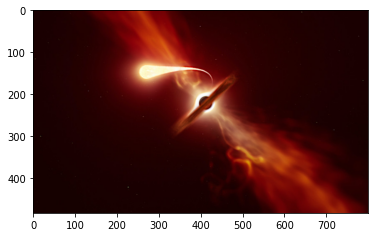

In [ ]:
url = "https://dam.muyinteresante.com.mx/wp-content/uploads/2020/10/eso2018a.jpg"
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)


Let's start with a makeover which means moving all the pixels in the image in one direction, such as horizontally or vertically, while keeping the same image dimensions.

The width_shift_range and height_shift_range arguments of the ImageDataGenerator constructor control the amount of horizontal and vertical scrolling respectively.

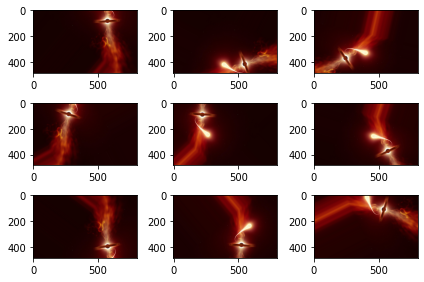

In [ ]:
# We convert the image to an arrangement
information = img_to_array(img)
# we expand to a sample
example = expand_dims(data, 0)
# We create the data augmenter using only image change
generatorofdata = ImageDataGenerator(width_shift_range=[-100,100])
# we prepare the iterator
it = datagen.flow(samples, batch_size=1)
# we generate samples and display the results
for i in range(9):
	plt.subplot(330 + 1 + i)
	# batches of images are generated
	batch = it.next()
	image = batch[0].astype('uint8') # is converted to a valid value so that it can be displayed as an image
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The magnification is specified by a Boolean argument ** horizontal_flip ** or ** vertical_flip ** for the ** ImageDataGenerator ** class.

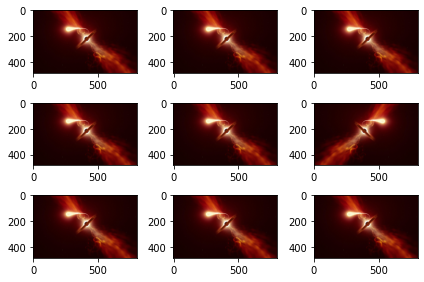

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [lower limit, upper limit]. Range for random zoom. If it is a float, [lower limit, upper limit] = [1-zoom_range, 1 + zoom_range

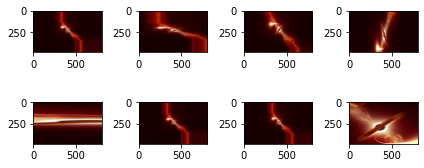

In [ ]:
datagen = ImageDataGenerator(zoom_range=1.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(8):
	plt.subplot(340+ 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()


The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It will likely rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

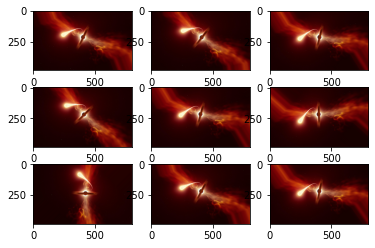

In [ ]:
datagen = ImageDataGenerator(rotation_range=50)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many jobs a data augmentation is used to increase the amount of training images and improve the precision of the job.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

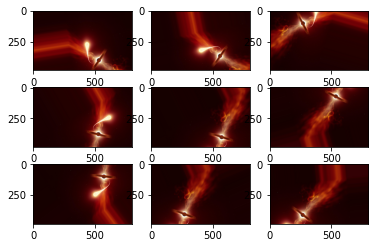

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 85,      
            width_shift_range            = [150,150],   
            height_shift_range           = [150,150],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely. There are some libraries that can help us to carry out this task, we will start by analyzing the following:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [ ]:
!pip install textattack

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

AttributeError: ignored

In [ ]:
text = "Will you look back on life and say, I wish I had, or I’m gad I did?"

TextAttack provides us with four methods for data augmentation


# "WordNetAugmenter"
Augments the text by replacing it with synonyms from the WordNet thesaurus (thesaurus).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept. WordNet superficially resembles a thesaurus in that it groups words based on their meaning.



aug = WordNetAugmenter();

aug.augment(text)

['Will you look back on life and say, I wish I had, or I’m gad ace did?']


## EmbeddingAugmenter
Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.


aug = EmbeddingAugmenter();

aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:08<00:00, 58.1MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpbsiwj787.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.
['Will you look back on life and tell, I wish I had, or I’m gad I did?']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

aug = CharSwapAugmenter()

aug.augment(text)

['Will you luook back on life and say, I wish I had, or I’m gad I did?']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


aug = CharSwapAugmenter()

aug.augment(text)

['Will you luook back on life and say, I wish I had, or I’m gad I did?']

In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['Will you look back on life and say, I wish I had, or 1’m gad I did?',
 'Will you look back on life and say, I wish I had, or I’m gad lifetime I did?',
 'Will you look back on life and say, I wish I had, or I’m gad I did?',
 'Will you look back on life and say, I wish I had, or I’m gad did?']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the translate () method are:

src: source language. this parameter is optional as googletrans will detect it.
dest: target language. Mandatory parameter.

text: the text to be translated from the source language to the target language. Mandatory parameter.

When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still preserved.

The supported languages can be consulted at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.



Some examples of languages:

Afrikaans 'af'

Chinese (simplified) 'zh-CN or zh'

Esperanto 'eo'

Japanese 'ha'

Latin 'laz'

Spanish 'es'

Turkmen 'tk'

Yiddish 'yi'

Zulu 'zu'


In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 972kB 7.1MB/s 
     |████████████████████████████████| 51kB 2.5MB/s 
     |████████████████████████████████| 71kB 1.4MB/s 
     |████████████████████████████████| 61kB 836kB/s 
     |████████████████████████████████| 102kB 941kB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=5fe5ceac36f327a6b901702f3e499641aef8ac0200f37d5a7961bbac9cf6bc71
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=91d36dba447197d2e849c46302817524d48228aabbf020b0ddd6039270673bc3
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [ ]:
origin_text = "If at first you don’t succeed, try, try again."
text_trans = translator.translate(text=origin_text, dest='zu').text
final=translator.translate(text=text_trans, dest='en').text
print(origin_text)
print(text_trans)
print(final)

If at first you don’t succeed, try, try again.
Uma ekuqaleni ungaphumeleli, zama, uzame futhi.
If at first you fail, try again.


In [ ]:
datagen = ImageDataGenerator(image_size=256)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

TypeError: ignored